In [1]:
%cd ../..

/home/armand/PhD/FFF_fiberlearning


In [2]:
from fff.data import load_dataset

datasets = load_dataset("2moons")

INFO: Using pytorch backend
INFO: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


2moons


In [3]:
from fff import FreeFormInjectiveFlow, FreeFormInjectiveFlowHParams
from fff.model import ResNet

config = { 
    "latent_distribution": {
      "name": "normal",
    },
    "data_set": {
      "name": "2moons",
    },
    
    "noise": 0.1,
    
    "loss_weights": {
      "nll": 1,
      "noisy_reconstruction": 10,
    },
    
    "models": 
        [{"name": "fff.model.ResNet",
        "latent_dim": 1,
        "layers_spec": [[256, 256], [256, 256]]}],
    
    
    "lr_scheduler": "onecyclelr",
    
    "batch_size": 128,
    "optimizer": {
      "name": "adam",
      "lr": 0.001,
      #weight_decay: 0.0001
    },
    
    "max_epochs": 25,
    
    "num_workers": 4,
    "gradient_clip": 3.0,
    "accelerator": "gpu",
}

SubjectModelHParams = FreeFormInjectiveFlowHParams(**config)

In [4]:
SubjectModel = FreeFormInjectiveFlow(hparams=SubjectModelHParams)

2moons
cond_dim:  0
latent_dim:  1


In [5]:
SubjectModel.fit(
    logger_kwargs={"save_dir": "notebooks/SubjectModels/saved_models", "name": "SubjectModel_ResNet_2moons"},
)

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
2025-01-09 16:21:27.108002: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 16:21:27.143576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instr

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=25` reached.
INFO: `Trainer.fit` stopped: `max_epochs=25` reached.


{'training/z 1D-Wasserstein-1': 0.2851231098175049,
 'training/z std': 1.2057076692581177,
 'training/loss': 0.6177794933319092,
 'training/nll': 0.38225385546684265,
 'training/reconstruction': 0.026617616415023804,
 'training/noisy_reconstruction': 0.023552563041448593,
 'validation/z 1D-Wasserstein-1': 0.2077654004096985,
 'validation/z std': 1.1279802322387695,
 'validation/loss': 2.7374229431152344,
 'validation/nll': 2.4010748863220215,
 'validation/vol_change_encoder': -0.5727848410606384,
 'validation/vol_change_decoder': -0.8455078601837158,
 'validation/nll_encoder': 2.128352165222168,
 'validation/nll_decoder': 2.4010748863220215,
 'validation/reconstruction': 0.03979344293475151,
 'validation/noisy_reconstruction': 0.033634789288043976,
 'validation/z_reconstruction': 0.013313465751707554,
 'validation/z_reconstruction_encoder': 0.013313465751707554,
 'validation/z_sample_reconstruction': 0.0498717799782753,
 'validation/x_sample_reconstruction': nan,
 'validation/shuffled_

/home/armand/miniconda3/lib/python3.10/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/armand/PhD/FFF_fiberlearning/fff/evaluate/plots.py:336: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*train_samples.T, s=1, cmap=data_cmap)


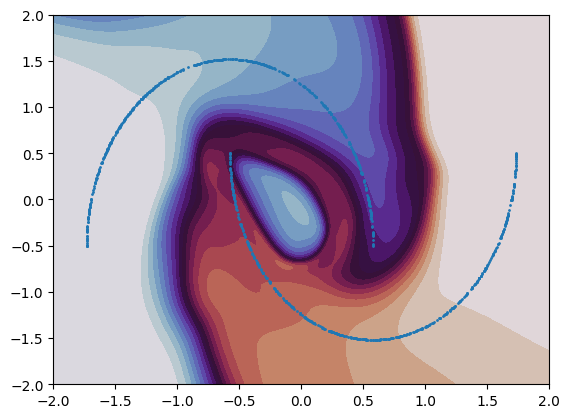

In [6]:
from fff.evaluate.plots import plot_latent_codes,plot_latent_codes_2d_1d

plot_latent_codes_2d_1d(SubjectModel)

In [12]:
from torch.utils.data import TensorDataset
import torch

@torch.no_grad()
def get_dataset_from_subject_model(SubjectModel):
    train_set, val_set, test_set = SubjectModel.train_data[:], SubjectModel.val_data[:], SubjectModel.test_data[:]
    train_conditioned, val_conditioned, test_conditioned = SubjectModel.apply_conditions(train_set), SubjectModel.apply_conditions(val_set), SubjectModel.apply_conditions(test_set)
    train_z, val_z, test_z = SubjectModel.encode(train_conditioned.x_noisy, train_conditioned.condition), \
                             SubjectModel.encode(val_conditioned.x_noisy, val_conditioned.condition), \
                             SubjectModel.encode(test_conditioned.x_noisy, test_conditioned.condition)

    datasets = (
        TensorDataset(train_conditioned.x_noisy, train_z),
        TensorDataset(val_conditioned.x_noisy, val_z),
        TensorDataset(test_conditioned.x_noisy, test_z),
    )
    return datasets

In [13]:
datasets_fiber_model = get_dataset_from_subject_model(SubjectModel)

In [14]:
import os

os.makedirs("datasets/SubjectModel_ResNet_2moons", exist_ok=True)

torch.save(datasets_fiber_model[0], "datasets/SubjectModel_ResNet_2moons/train.pt")
torch.save(datasets_fiber_model[1], "datasets/SubjectModel_ResNet_2moons/val.pt")
torch.save(datasets_fiber_model[2], "datasets/SubjectModel_ResNet_2moons/test.pt")
torch.save(SubjectModel, "datasets/SubjectModel_ResNet_2moons/subject_model.pt")

/tmp/ipykernel_14911/2731756106.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ds = torch.load("datasets/SubjectModel_ResNet_2moons/train.pt")


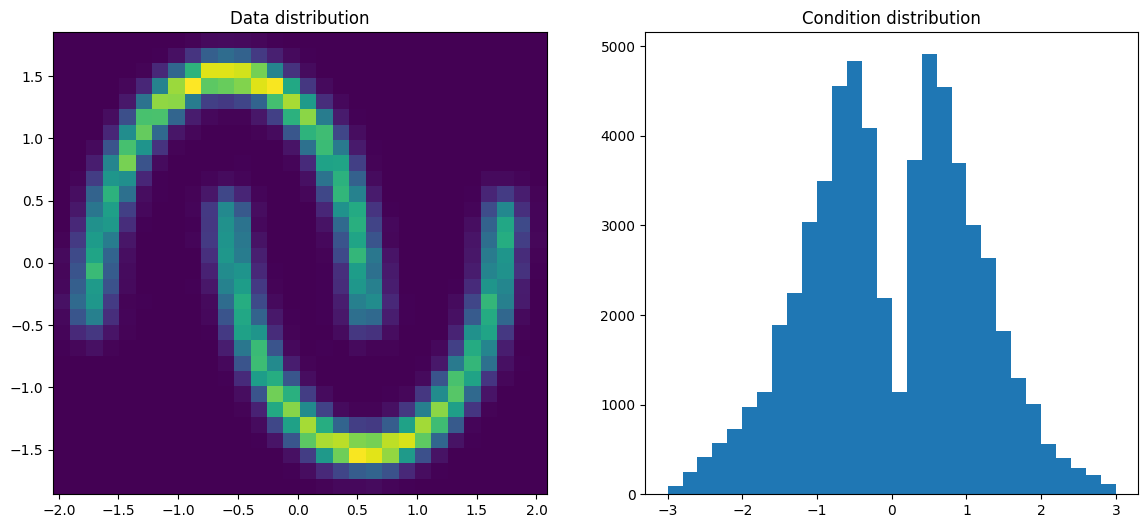

In [10]:
# Sanity check
import matplotlib.pyplot as plt

ds = torch.load("datasets/SubjectModel_ResNet_2moons/train.pt")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Data distribution")
plt.hist2d(*ds[:][0].T, bins=30)
plt.subplot(1, 2, 2)
plt.title("Condition distribution")
plt.hist(ds[:][1], bins=30, range=[-3, 3])
plt.show()